In [1]:
%matplotlib inline

# 592B, Class 4.1 (02/12). Fourier series, aliasing, Sampling theorem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 
import scipy.signal as signal

from ipywidgets import interactive
from IPython.display import Audio, display

## Review questions

### Define a square wave function

Define a square wave function $f(t)$ with a period of $T=0.5s$, with a range of [0,2], with a value of 0 at $x=0$.

(1a) Do this using [`scipy.signal.square`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.square.html).

To help understand `scipy.signal.square`, first let's look at the examples from `help` for `scipy.signal.square` and try out the first one--just copy and paste the code in.

In [3]:
help(signal.square) 

Help on function square in module scipy.signal.waveforms:

square(t, duty=0.5)
    Return a periodic square-wave waveform.
    
    The square wave has a period ``2*pi``, has value +1 from 0 to
    ``2*pi*duty`` and -1 from ``2*pi*duty`` to ``2*pi``. `duty` must be in
    the interval [0,1].
    
    Note that this is not band-limited.  It produces an infinite number
    of harmonics, which are aliased back and forth across the frequency
    spectrum.
    
    Parameters
    ----------
    t : array_like
        The input time array.
    duty : array_like, optional
        Duty cycle.  Default is 0.5 (50% duty cycle).
        If an array, causes wave shape to change over time, and must be the
        same length as t.
    
    Returns
    -------
    y : ndarray
        Output array containing the square waveform.
    
    Examples
    --------
    A 5 Hz waveform sampled at 500 Hz for 1 second:
    
    >>> from scipy import signal
    >>> import matplotlib.pyplot as plt
    >>> t = n

Here's the first example:

> A 5 Hz waveform sampled at 500 Hz for 1 second:


```python
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)
```

Let's try it:

(-2, 2)

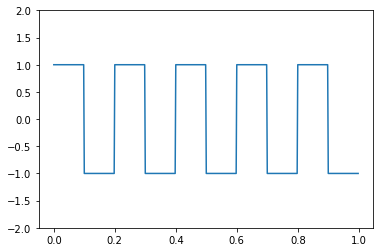

In [4]:
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

Note that this function `signal.square(2 * np.pi * 5 * t)` has an f0 of 5Hz, a period of 1/5 s, and a range of [-1,1]. 

(1b) Define the same function using a conditional `if`...`else` structure, and Python's [*modulus* operator](https://docs.python.org/2/reference/expressions.html#binary-arithmetic-operations), `%`. 

Here's an example to get you started, for `scipy.signal.square` with a range of [-1,1], $T=2$, and $f(0)=1$. First let's plot what this looks like.

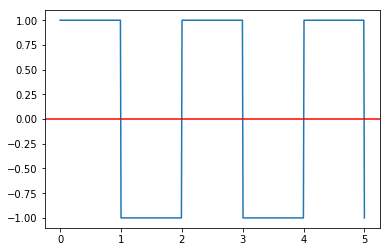

In [5]:
t = np.linspace(0, 5, 500)
plt.plot(t, signal.square(2*np.pi*0.5*t))
plt.axhline(y=0, color='r', linestyle='-') # Show x-axis

To define this "by hand", I need to say something like: 
> From 0 to $\pi$, $f(t)=1$. From $\pi$ to $2\pi$, $f(t) = -1$. And so on, for a period of $T=2\pi$. 

In other words, 
- if $t/2$ has a remainder < 1, then $f(t)=1$. 
- Otherwise, $f(t)=-1$.   

We can implement this as follows:

1
1
-1
-1
1


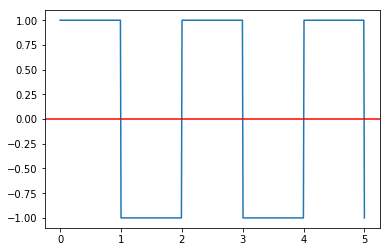

In [6]:
def my_square(x): # define your own square function!
    if (x % 2 < 1): # if x/2 has a remainder < 1
        y = 1 # then return y=1
    else:
        y = -1 # else, return y=-1
    return(y)

# Spot checks, compare to what we expect
print(my_square(2))
print(my_square(2.5))
print(my_square(3))
print(my_square(3.5))
print(my_square(4))

# Now let's try using a list comprehension over a vector of t-values
ts = np.linspace(0, 5, 500)
plt.plot(t, [my_square(t) for t in ts])
plt.axhline(y=0, color='r', linestyle='-') # Show x-axis    

***Now you try, for a square wave function f(t) with a period of $T=3s$, a range of [0,2], and a value of 0 at $x=0$.***

### Resampling adventures

First, let's read in the WAV file and print the sampling rate `fs` and the number of samples in the signal, `len(data)`.

In [12]:
fs, data = wavfile.read('hmong_m6_24_c.wav')
ns = len(data) # number of samples
print("The sampling rate is", fs, "Hz.")
print("The number of samples is", ns, "samples.")

The sampling rate is 22050 Hz.
The number of samples is 35015 samples.


***In-class exercise: What is the duration of the audio file? Define `t_start` = 0, and `t_stop` as the total duration you compute.***

In [13]:
t_start = 0
t_stop = ns/fs

Now let's see how `scipy.signal.resample` works.

In [9]:
help(signal.resample)

Help on function resample in module scipy.signal.signaltools:

resample(x, num, t=None, axis=0, window=None)
    Resample `x` to `num` samples using Fourier method along the given axis.
    
    The resampled signal starts at the same value as `x` but is sampled
    with a spacing of ``len(x) / num * (spacing of x)``.  Because a
    Fourier method is used, the signal is assumed to be periodic.
    
    Parameters
    ----------
    x : array_like
        The data to be resampled.
    num : int
        The number of samples in the resampled signal.
    t : array_like, optional
        If `t` is given, it is assumed to be the sample positions
        associated with the signal data in `x`.
    axis : int, optional
        The axis of `x` that is resampled.  Default is 0.
    window : array_like, callable, string, float, or tuple, optional
        Specifies the window applied to the signal in the Fourier
        domain.  See below for details.
    
    Returns
    -------
    resampled_x 

Let's first try out the example from the help file:

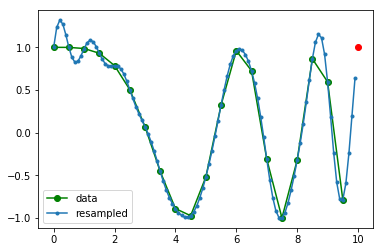

In [14]:
x = np.linspace(0, 10, 20, endpoint=False)
y = np.cos(-x**2/6.0)
f = signal.resample(y, 100)
xnew = np.linspace(0, 10, 100, endpoint=False)
    
plt.plot(x, y, 'go-', xnew, f, '.-', 10, y[0], 'ro')
plt.legend(['data', 'resampled'], loc='best')
plt.show()

Now let's try resampling from $f_s=22.05\,kHz$ to $f_{s,new} = 11\,kHz$. 
To do that, we need to specify a new number of samples for the resampled signal, $ns_{new}$. 
Note that the ratio by which we "downsample", $22.05/11$, is the ratio by which the number of samples increases. That is:

\begin{equation}
\frac{ns_{new}}{ns} = \frac{f_{s}}{f_{s,new}}
\end{equation}

and therefore,

\begin{equation}
ns_{new} = \frac{f_{s}}{f_{s,new}} \cdot ns
\end{equation}
So we can resample as follows:

In [15]:
fs, data = wavfile.read('hmong_m6_24_c.wav')
ns = len(data) # number of samples
print("The old sampling rate is", fs, "Hz.")
print("The old number of samples is", ns, "samples.")

fs_new = 11000 # Sample rate for resampling is 11kHz
ns_new = fs/fs_new * ns

print("The new number of samples is", ns_new, "samples.")
print("The data type for ns is:", type(ns))
print("The data type for ns_new is:", type(ns_new))

signal.resample(data,ns_new)

The old sampling rate is 22050 Hz.
The old number of samples is 35015 samples.
The new number of samples is 70189.15909090909 samples.
The data type for ns is: <class 'int'>
The data type for ns_new is: <class 'float'>


TypeError: 'float' object cannot be interpreted as an integer

Uh-oh. We're getting an error because we can't have a non-integer number of samples! We need to force the number of samples to be an integer, e.g., by rounding, and converting to `integer` type. Then we'll be able to resample.

In [16]:
ns_new = int(round(fs/fs_new * ns))
data_new = signal.resample(data,ns_new)
print("The number of samples in the re-sampled signal is", len(data_new), "samples.")

#Note that `signal.resample` can also take an additional argument,
#the original vector of sampled timepoints, and then return
#the new vector of sampled timepoints for the resampled signal.

The number of samples in the re-sampled signal is 70189 samples.


Now let's try plotting the two signals for comparison, adapting from the help example code.

Text(0,0.5,'Amplitude')

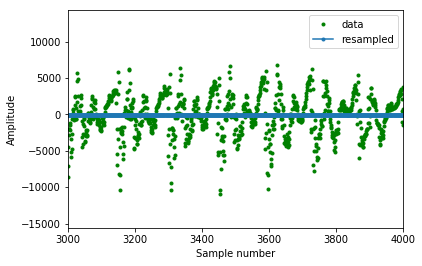

In [17]:
plt.plot(data,'g.', data_new, '.-')
plt.xlim(3000,4000)
plt.legend(['data', 'resampled'], loc='best')
plt.xlabel("Sample number")
plt.ylabel("Amplitude")

***In-class exercise. Examine this plot and comment on it. Then, plot with time in seconds on the x-axis rather than number of samples.***

Text(0,0.5,'Amplitude')

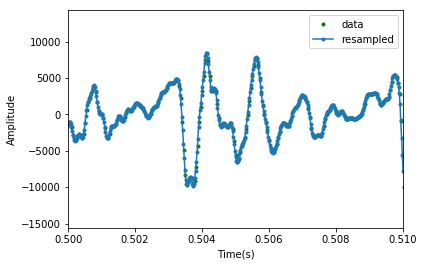

In [18]:
#ns = (t_stop - t_start) * fs + 1
x = np.linspace(t_start, t_stop, ns)
x_new = np.linspace(t_start, t_stop, ns_new)

plt.plot(x, data,'g.', x_new, data_new,'.-')
plt.xlim(0.5,0.51)
plt.legend(['data', 'resampled'], loc='best')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")


OK, now let's try listening to this.

In [ ]:
display(Audio(data=data_new,rate = fs_new))

Something is clearly wrong because the duration of the audio file has gone up. Also, we know from experience that 11 kHz should be sufficient for capturing the nuances of the speech signal. This is because a lot of the important information in the speech signal is at frequencies under 5000 Hz, and because of the **Sampling Theorem** (which we will introduce shortly).

Now what? It would be nice to know what the resampled audio **ought** to sound like. Then we can compare what we're hearing in Python with what the resampled audio should sound like. Is there another way we can resample the audio to 11 kHz? Yes! We could do this in Praat; we could do this in Sox; we could do this in Audacity, etc. 

**Let's do that. What does the resampled audio sound like compared to the original? How does it compare to the sound of the resampled audio from Python?**

Maybe there's something weird about `Audio` module. What if we try writing the resampled signal to a WAV file using [`scipy.io.wavfile.write`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html)? Then we could both listen to the output WAV files in external software (outside of Python), and we could also try reading the output WAV file back into Python and then using `Audio` to play the audio again.

Let's look at the `help` files for `wavfile.write`.

In [ ]:
help(wavfile.write)

In [ ]:
wavfile.write("resampled_hmong_11kHz.wav",fs_new,data_new)
fs_new_read, data_new_read = wavfile.read("resampled_hmong_11kHz.wav")

display(Audio(data=data_new_read,rate = fs_new_read))

display(Audio(data=data_new, rate = fs_new))


Well that didn't help: the audio of the read-in file sounds the same as the `Audio` output.

If we look at more info on the audio file written, it seems to have something funny going on with the encoding.

A closer look at `wavfile.write` help files tells us that the data type of the `numpy` array determines how the WAV file is encoded. Maybe that's what's going on. Let's try resampling again and look at the data type of the resulting array.

In [ ]:
data_new2, x_new2 = signal.resample(data,ns_new,x)
print(data_new2.dtype)



Aha it's float64. That's not on the list of data type conversion to WAV file encodings! Let's try getting to 16-bit, using `int16` type. Googling around, we might try something like below. But still no luck...

In [22]:
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
print(scaled.dtype)

data_new2, x_new2 = signal.resample(scaled,ns_new,x)
print(data_new2.dtype)

scaled_new2 = np.int16(data_new2/np.max(np.abs(data_new2)) * 32767)
print(scaled_new2.dtype)

display(Audio(data=scaled,rate = fs))
display(Audio(data=scaled_new2,rate = fs_new))

wavfile.write("resampled_hmong_11kHz_try2.wav",fs_new,data_new2)

int16
float64
int16


11000


All right. Perhaps try another module for resampling.

In [25]:
pip install librosa
import librosa

SyntaxError: invalid syntax (<ipython-input-25-e94488978cb7>, line 1)

## Aliasing

Consider the following function:

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$

***In class-exercise: What is the (fundamental) frequency of $f(t)$?***

4001
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.99800000e+00
   3.99900000e+00   4.00000000e+00]
4001
4001


Text(0.5,1,'1000 Hz sampling rate')

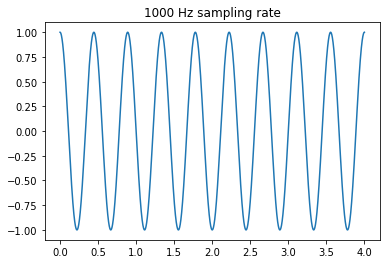

In [43]:
fs = 1000 # Sampling rate of 1000 Hz
t_start = 0; t_stop = 4
ns = int((t_stop - t_start) * fs + 1)
print(ns)
x = np.linspace(0,4,ns)
print(x)
print(len(x))
y = np.cos(9*np.pi/2*x)
print(len(y))

plt.figure("1000 Hz sampling rate")
plt.plot(x,y)
plt.title("1000 Hz sampling rate")


Now let's try sampling this signal at some different sampling rates:

1. 100 Hz
2. 10 Hz
3. 1 Hz

In [44]:

ns_100 = int((t_stop - t_start) * 100 + 1)
x_100 = np.linspace(0,4,ns_100)
y_100 = np.cos(9*np.pi/2*x_100)

ns_10 = int((t_stop - t_start) * 10 + 1)
x_10 = np.linspace(0,4,ns_10)
y_10 = np.cos(9*np.pi/2*x_10)

ns_1 = int((t_stop - t_start) * 1 + 1)
x_1 = np.linspace(0,4,ns_1)
y_1 = np.cos(9*np.pi/2*x_1)



[None, None]

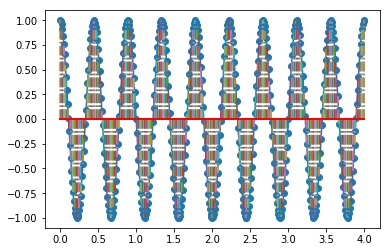

In [45]:
plt.figure("100 Hz sampling rate")
plt.plot(x,y)
markerline, stemlines, baseline = plt.stem(x_100,y_100, '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)


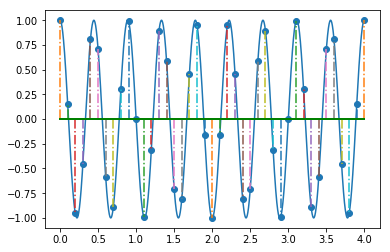

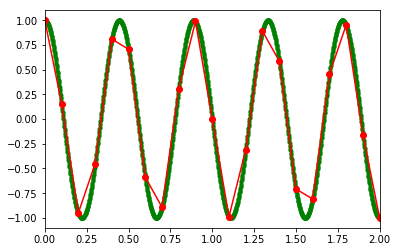

In [46]:

plt.figure("10 Hz sampling rate")
plt.plot(x,y)
markerline, stemlines, baseline = plt.stem(x_10,y_10, '-.')
plt.setp(baseline, 'color', 'g', 'linewidth', 2)

plt.figure("10 Hz sampling rate 2")
plt.xlim(0,2)
plt.plot(x,y, 'g.', x_10, y_10, 'ro-')

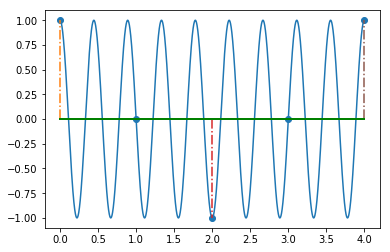

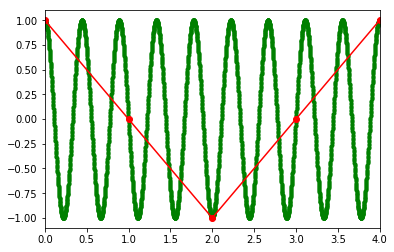

In [47]:
plt.figure("1 Hz sampling rate")
plt.plot(x,y)
markerline, stemlines, baseline = plt.stem(x_1,y_1, '-.')

plt.setp(baseline, 'color', 'g', 'linewidth', 2)
plt.figure("1 Hz sampling rate 2")
plt.xlim(0,4)
plt.plot(x,y, 'g.', x_1, y_1, 'ro-')

Wow, we sure are missing a lot of data--could we still recover the original signal $y(t)$?

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$


***In-class exercise: can you think of a function $z(t)$ that has the same values as our $y(t)$ at the sampled timepoints when we sample with a rate of 1Hz? If so, plot it together with the original signal and the 1 Hz sampling points.*** 

To do this, you could change
```
plt.plot(x,y)
```
to something like this, where `z` is your definition of $z(t)$ and `x2` is a vector of the sampled time points for 1 Hz sampling rate:

```
plt.plot(x,y, 'g.', x2, z, 'ro-')
```

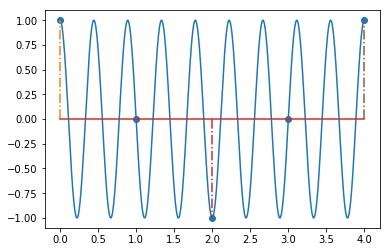

In [48]:
plt.figure("1 Hz sampling rate, aliasing")
plt.plot(x,y) # change this to add in plot of z(t)
markerline, stemlines, baseline = plt.stem(x_1,y_1, '-.')

***In-class exercise: suppose you sample at a sampling rate of 4.5 Hz. Overlay the stem plot with the original signal for this sampling rate (like the previous plots).***


## The sampling theorem

The minimal sampling rate that can be used to reconstruct a signal from its samples is two times the frequency of the highest frequency component $\nu_{max}$ in the signal:

   sampling rate $> 2\nu_{max}$

The frequency 2$\nu_{max}$ is often called the **Nyquist frequency**.

***In-class exercise: What is the Nyquist frequency for $y(t)$ below?***

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$


So for a complex wave (a sum of sinusoids), increasing the frequency of the highest frequency component $\nu_{max}$ drives up the required sampling rate for reconstruction. Sometimes there is no highest frequency, e.g., in an infinite series like for a square wave.

Here's a intuitive example to play with. Plot a signal composed of a low frequency sinusoid and a high frequency sinusoid. As the gap in frequencies between the two frequency components increases, the resulting complex wave looks closer and closer to the lower frequency component, with lots of squigglies up and down at the frequency of the higher frequency component.


In [66]:
def plot_play_summed_sines(f1 = 440, f2 = 880, t_start = 0, t_stop = 2, fs = 44100, xlim_max = 0.01):
    x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
    y1 = np.sin(2*np.pi*f1*x)
    y2 = np.sin(2*np.pi*f2*x)
    
    plt.xlim(t_start,xlim_max)
    plt.plot(x , y1, "-g", label="y1") 
    plt.plot(x , y2, "-b", label="y2") 
    plt.plot(x , y1 + y2, "-r", label="y1+y2") 
    plt.legend(loc="upper right") 
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    plt.title("Adding up sines") 
    
    display(Audio(data=y1, rate=fs))
    display(Audio(data=y2, rate=fs))
    display(Audio(data=y1+y2, rate=fs))
    
v = interactive(plot_play_summed_sines, f1=(50,200), f2=(1000,5000), t_start = (0,0), t_stop = (0,5), xlim_max = (0.01,0.5))
display(v)    

A Jupyter Widget

If we **undersample**, we get **aliasing**: two functions may be indistinguishable based on our sampling, and we may recover a lower frequency alias of the actual signal. We can also have [visual aliasing](http://danielwalsh.tumblr.com/post/54400376441/playing-detective-with-rolling-shutter-photos).